In [1]:
#IMPORTE DE LIBRERIAS
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#IMPORTAMOS EL DATASET DE IMAGENES
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [3]:
#IMPRIMIMOS LAS LABELS, NUMERO DE IMAGENES...
print(faces.keys())
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

#IMPRIMIMOS EL MAXIMO, MINIMO Y EL PROMEDIO DE DATOS QUE YA ESTAN NORMALIZADOS

print(np.max(faces.data))
print(np.min(faces.data))
print(np.mean(faces.data))


['images', 'data', 'target', 'DESCR']
(400, 64, 64)
(400, 4096)
(400,)
1.0
0.0
0.547043


In [4]:
def print_faces(images, target, top_n):
    # configuramos el tamaño de las imágenes por pulgadas
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # graficamos las imagenes en una matriz de 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # etiquetamos las imágenes con el valor objetivo (target value)
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

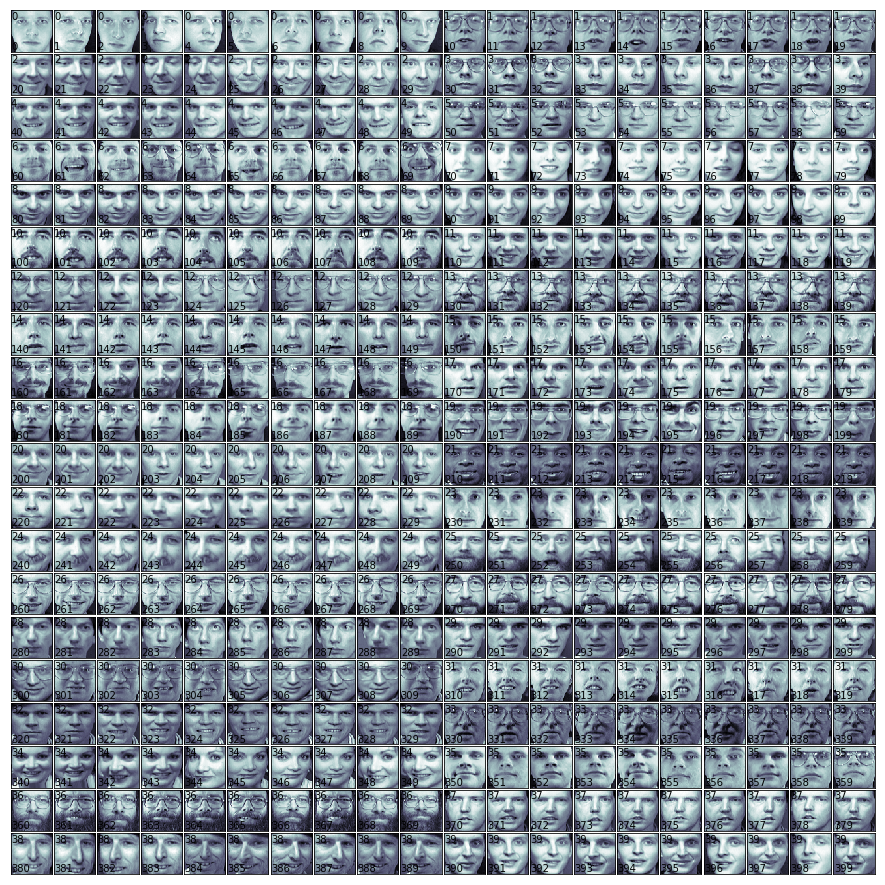

In [5]:
print_faces(faces.images, faces.target, 400)

In [6]:
#IMPORTAMOS SUPPORT VECTOR MACHINE

from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
print(svc_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [7]:
#CREAMOS LOS CONJUNTOS TRAIN Y TEST

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        faces.data, faces.target, test_size=0.25, random_state=0)


/opt/miniconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
#ESTABLECEMOS EL KFOLD CROSS VALIDATION

from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # creamos un k-fold croos validation iterator
    #cv = KFold(len(y), K, shuffle=True, random_state=0)
    # por defecto el puntaje usado es el devuelto por el estimator (exactitud)
    scores = cross_val_score(clf, X, y, cv=KFold(len(y), shuffle=True))
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
    print "MSE %.3f (+/- %.5f)"%(np.mean(scores), np.std(scores))
    
   
  


In [9]:
  #evalua
evaluate_cross_validation(svc_1, X_train, y_train, 6)

[ 0.89  0.87  0.88]
Mean score: 0.880 (+/-0.006)
MSE 0.880 (+/- 0.00816)


In [10]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print("Exactitud training set:")
    print(clf.score(X_train, y_train))
    print("Exactitud testing set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

In [11]:
#MEDIMOS LA PRECISION EN EL SET DE EVALUACION DE CADA CLASE
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Exactitud training set:
1.0
Exactitud testing set:
0.99
Confusion Matrix:
[[6 0 0 ..., 0 0 0]
 [0 4 0 ..., 0 0 0]
 [0 0 2 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 3 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 3]]


<H2 align="center">EJEMPLO DE DISCRIMINACION DE ATRIBUTOS<H2/>
<h3 align="center"> PERSONAS CON LENTES O SIN LENTES<h3/>
   

In [12]:
#indices de imagenes de personas con lentes
glasses = [(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
           (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
           (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
           (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
           (330, 339), (358, 359), (360, 369)]

In [13]:
def create_target(segments):
    #creamos un nuevo array "y"
    y = np.zeros(faces.target.shape[0])
    
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [14]:
target_glasses = create_target(glasses)

X_train, X_test, y_train, y_test = train_test_split(
    faces.data, target_glasses, test_size=0.25, random_state=0)

In [15]:
#UTILIZAMOS UN KERNEL LINEAL

svc_2 = SVC(kernel='linear')
evaluate_cross_validation(svc_2, X_train, y_train, 5)
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

[ 0.94  0.92  0.98]
Mean score: 0.947 (+/-0.018)
MSE 0.947 (+/- 0.02494)
Exactitud training set:
1.0
Exactitud testing set:
0.99
Confusion Matrix:
[[66  1]
 [ 0 33]]


In [16]:
#TOMAMOS 390 IMAGENES PARA ENTRENAMIENTO Y PRUEBA. LUEGO PASAMOS 10 IMAGENES CON Y SIN GAFAS PARA EVALUAR.

X_test = faces.data[30:40]
y_test = target_glasses[30:40]

print(y_test.shape[0])

select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

print(y_train.shape[0])

10
390


In [17]:
svc_3 = SVC(kernel='linear')
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)
y_pred = svc_3.predict(X_test)

Exactitud training set:
1.0
Exactitud testing set:
0.9
Confusion Matrix:
[[5 0]
 [1 4]]


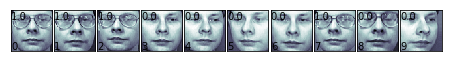

In [18]:
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)

<H2 align="center">EJEMPLO DE DISCRIMINACION DE ATRIBUTOS<H2/>
<h3 align="center"> PERSONAS CON SONRISA<h3/>

In [21]:
smiles = [(46, 49), (69, 70), (72, 75), (90, 93), (145, 146),
           (190, 191), (213, 217), (260, 261), (267, 268), (311, 316),
           (323, 328), (340, 343), (380, 389), (391, 393)]

In [22]:
def create_target(segments):
    #creamos un nuevo array "y"
    y = np.zeros(faces.target.shape[0])
    
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [31]:
target_smiles = create_target(smiles)

X_train, X_test, y_train, y_test = train_test_split(
    faces.data, target_smiles, test_size=0.25, random_state=0)

In [32]:
#UTILIZAMOS UN KERNEL LINEAL

svc_2 = SVC(kernel='linear')
evaluate_cross_validation(svc_2, X_train, y_train, 5)
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

[ 0.88  0.88  0.9 ]
Mean score: 0.887 (+/-0.007)
MSE 0.887 (+/- 0.00943)
Exactitud training set:
1.0
Exactitud testing set:
0.85
Confusion Matrix:
[[79  7]
 [ 8  6]]


In [50]:
#TOMAMOS 390 IMAGENES PARA ENTRENAMIENTO Y PRUEBA. LUEGO PASAMOS 10 IMAGENES CON Y SIN SONRISA PARA EVALUAR.

X_test = faces.data[70:80]
y_test = target_smiles[30:40]

print(y_test.shape[0])

select = np.ones(target_smiles.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_smiles[select == 1]

print(y_train.shape[0])

10
390


In [51]:
svc_4 = SVC(kernel='linear')
train_and_evaluate(svc_4, X_train, X_test, y_train, y_test)
y_pred = svc_4.predict(X_test)

Exactitud training set:
1.0
Exactitud testing set:
0.5
Confusion Matrix:
[[5 5]
 [0 0]]


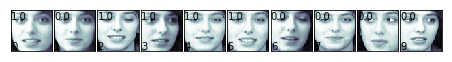

In [52]:
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)